In [43]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [44]:
# 0) Prepare data
# The noise=20 means that Gaussian noise with a standard deviation of 20 
# is added to the output (target) variable, introducing random variations 
# around the true regression line
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [45]:
X_numpy

array([[-1.3474603 ],
       [ 0.3523434 ],
       [ 0.9546986 ],
       [ 0.03592805],
       [ 0.04800625],
       [ 0.04860301],
       [ 0.72334161],
       [ 0.80208661],
       [-1.14379857],
       [ 0.17941071],
       [-0.64770677],
       [-1.11281215],
       [-1.58457724],
       [-0.08798693],
       [ 2.47658416],
       [-0.7322647 ],
       [ 1.54697933],
       [-0.13070464],
       [ 0.30044554],
       [-0.9443686 ],
       [-0.30296397],
       [-0.37444492],
       [-1.15681626],
       [ 0.59857517],
       [-2.37977527],
       [-0.60768369],
       [ 0.54245131],
       [ 2.02240507],
       [ 0.04613557],
       [ 0.52324766],
       [ 0.29714121],
       [-1.54292905],
       [ 1.69235772],
       [ 0.20931349],
       [-0.41830152],
       [ 0.87084178],
       [-1.14747663],
       [-0.17521053],
       [-0.9617768 ],
       [ 0.1886462 ],
       [ 1.20200259],
       [ 1.99008302],
       [-1.36096559],
       [-0.05455871],
       [ 1.16418756],
       [-1

In [46]:
y_numpy

array([-126.24922409,   50.92876904,   63.15463302,    6.05472009,
         -5.72954025,   -2.75191769,   58.70355923,   53.81362958,
        -95.34105851,   24.64812471,  -59.41697406,  -73.42349619,
       -104.16266749,   31.80766772,  171.15350154,  -67.75196497,
        141.46769811,  -24.36756973,   -2.11240097,  -32.59583109,
        -29.41505819,  -37.87145989, -101.89829601,   46.41287784,
       -181.34840044,  -31.77399504,   24.13154879,  163.94385144,
         10.77367111,   37.35891532,    0.98036703, -120.88573188,
        138.19938797,    9.20267903,  -16.2068899 ,   33.21708479,
        -45.61698488,   -1.77758908, -105.56283971,    5.26394625,
         89.5978923 ,  146.10300439,  -77.78704394,   -3.80893607,
         60.81195812,  -97.2027103 ,   -1.15989334,  -43.88245964,
         15.74278405,  -24.27446551,  -90.60148118,  -19.07314539,
       -101.79001521,  -56.55140067,   52.1696979 , -158.28468928,
         64.53968736,   84.52102913,   66.43434451,   36.86598

In [47]:
print(X_numpy.dtype)
print(y_numpy.dtype)

float64
float64


In [48]:
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [49]:
y.shape

torch.Size([100])

In [50]:
# reshape y to become column vector
y = y.view(y.shape[0], 1)
y

tensor([[-126.2492],
        [  50.9288],
        [  63.1546],
        [   6.0547],
        [  -5.7295],
        [  -2.7519],
        [  58.7036],
        [  53.8136],
        [ -95.3411],
        [  24.6481],
        [ -59.4170],
        [ -73.4235],
        [-104.1627],
        [  31.8077],
        [ 171.1535],
        [ -67.7520],
        [ 141.4677],
        [ -24.3676],
        [  -2.1124],
        [ -32.5958],
        [ -29.4151],
        [ -37.8715],
        [-101.8983],
        [  46.4129],
        [-181.3484],
        [ -31.7740],
        [  24.1315],
        [ 163.9438],
        [  10.7737],
        [  37.3589],
        [   0.9804],
        [-120.8857],
        [ 138.1994],
        [   9.2027],
        [ -16.2069],
        [  33.2171],
        [ -45.6170],
        [  -1.7776],
        [-105.5628],
        [   5.2639],
        [  89.5979],
        [ 146.1030],
        [ -77.7870],
        [  -3.8089],
        [  60.8120],
        [ -97.2027],
        [  -1.1599],
        [ -43

In [51]:
y.shape

torch.Size([100, 1])

In [52]:
n_samples, n_features = X.shape
print(n_samples, n_features)

100 1


In [53]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1 # one numerical value per sample
model = nn.Linear(input_size, output_size)

In [54]:
# 2) Loss and optimizer
# hyperparameters
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [55]:
# 3) Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4099.3657
epoch: 20, loss = 2887.0815
epoch: 30, loss = 2060.9827
epoch: 40, loss = 1497.9219
epoch: 50, loss = 1114.0626
epoch: 60, loss = 852.3157
epoch: 70, loss = 673.7977
epoch: 80, loss = 552.0198
epoch: 90, loss = 468.9309
epoch: 100, loss = 412.2285
epoch: 110, loss = 373.5258


epoch: 120, loss = 347.1038
epoch: 130, loss = 329.0623
epoch: 140, loss = 316.7413
epoch: 150, loss = 308.3255
epoch: 160, loss = 302.5761
epoch: 170, loss = 298.6477
epoch: 180, loss = 295.9630
epoch: 190, loss = 294.1280
epoch: 200, loss = 292.8736
epoch: 210, loss = 292.0160
epoch: 220, loss = 291.4296
epoch: 230, loss = 291.0285
epoch: 240, loss = 290.7542
epoch: 250, loss = 290.5665
epoch: 260, loss = 290.4382
epoch: 270, loss = 290.3503
epoch: 280, loss = 290.2902
epoch: 290, loss = 290.2491
epoch: 300, loss = 290.2209
epoch: 310, loss = 290.2016
epoch: 320, loss = 290.1884
epoch: 330, loss = 290.1794
epoch: 340, loss = 290.1732
epoch: 350, loss = 290.1690
epoch: 360, loss = 290.1660
epoch: 370, loss = 290.1640
epoch: 380, loss = 290.1627
epoch: 390, loss = 290.1617
epoch: 400, loss = 290.1611
epoch: 410, loss = 290.1607
epoch: 420, loss = 290.1604
epoch: 430, loss = 290.1602
epoch: 440, loss = 290.1600
epoch: 450, loss = 290.1599
epoch: 460, loss = 290.1599
epoch: 470, loss = 2

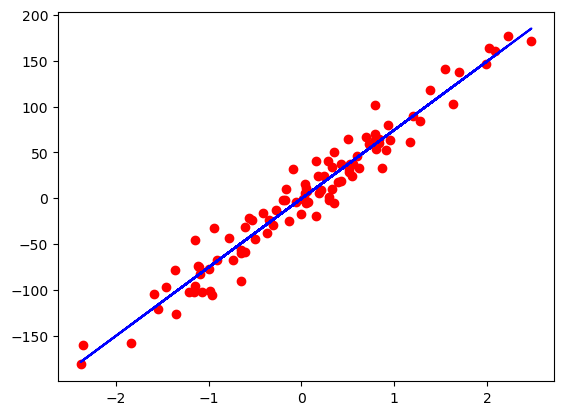

In [56]:
# Plot
# model(X).detach to prevent tracking history in autograd 
# by generating new tensor that does not require gradients
# and convert to numpy
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro') # 'ro' means red color and 'o' shape (RED DOTS) (scatter plot)
plt.plot(X_numpy, predicted, 'b') # 'b' means blue color (line plot)
plt.show()